<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#TUGAS-DEEP-LEARNING" data-toc-modified-id="TUGAS-DEEP-LEARNING-1">TUGAS DEEP LEARNING</a></span><ul class="toc-item"><li><span><a href="#Import-Library" data-toc-modified-id="Import-Library-1.1">Import Library</a></span></li><li><span><a href="#memasukkan-jumlah-class-yang-akan-di-pakai-dan-ukuran-gambar-yang-di-pakai" data-toc-modified-id="memasukkan-jumlah-class-yang-akan-di-pakai-dan-ukuran-gambar-yang-di-pakai-1.2">memasukkan jumlah class yang akan di pakai dan ukuran gambar yang di pakai</a></span></li><li><span><a href="#load-image-data-generator-untuk-memasukkan-data-gambar-training" data-toc-modified-id="load-image-data-generator-untuk-memasukkan-data-gambar-training-1.3">load image data generator untuk memasukkan data gambar training</a></span></li><li><span><a href="#mengecek-nama-label-dari-data-gambar" data-toc-modified-id="mengecek-nama-label-dari-data-gambar-1.4">mengecek nama label dari data gambar</a></span></li><li><span><a href="#Load-image-data-generator-untuk-memasukkan-data-gambar-testing" data-toc-modified-id="Load-image-data-generator-untuk-memasukkan-data-gambar-testing-1.5">Load image data generator untuk memasukkan data gambar testing</a></span></li><li><span><a href="#membangun-arsitektur-manual-berdasarkan-vgg16" data-toc-modified-id="membangun-arsitektur-manual-berdasarkan-vgg16-1.6">membangun arsitektur manual berdasarkan vgg16</a></span></li><li><span><a href="#melakukan-optimalisasi-model" data-toc-modified-id="melakukan-optimalisasi-model-1.7">melakukan optimalisasi model</a></span></li><li><span><a href="#mengecek-informasi-dari-layer-yang-telah-di-buat-manual" data-toc-modified-id="mengecek-informasi-dari-layer-yang-telah-di-buat-manual-1.8">mengecek informasi dari layer yang telah di buat manual</a></span></li><li><span><a href="#melakukan-fit-transform-terhadap-model-yang-telah-kita-buat-sebelumnya" data-toc-modified-id="melakukan-fit-transform-terhadap-model-yang-telah-kita-buat-sebelumnya-1.9">melakukan fit transform terhadap model yang telah kita buat sebelumnya</a></span></li><li><span><a href="#menginisialisasikan-accuracy-dan-validasi-terhadap-accurcy-model-dan-loss-model" data-toc-modified-id="menginisialisasikan-accuracy-dan-validasi-terhadap-accurcy-model-dan-loss-model-1.10">menginisialisasikan accuracy dan validasi terhadap accurcy model dan loss model</a></span></li><li><span><a href="#membuat-dan-mengecek-informasi-dari-training-dan-validasi-accuracy-dan-loss-di-dalam-dalam-bentuk-visualisasi" data-toc-modified-id="membuat-dan-mengecek-informasi-dari-training-dan-validasi-accuracy-dan-loss-di-dalam-dalam-bentuk-visualisasi-1.11">membuat dan mengecek informasi dari training dan validasi accuracy dan loss di dalam dalam bentuk visualisasi</a></span></li><li><span><a href="#melakukan-memasukkan-prediksi-pada-model-yang-telah-di-buat" data-toc-modified-id="melakukan-memasukkan-prediksi-pada-model-yang-telah-di-buat-1.12">melakukan memasukkan prediksi pada model yang telah di buat</a></span></li></ul></li><li><span><a href="#menvisualisasikan-data-yang-telah-di-prediksi" data-toc-modified-id="menvisualisasikan-data-yang-telah-di-prediksi-2">menvisualisasikan data yang telah di prediksi</a></span><ul class="toc-item"><li><span><a href="#Conclusion" data-toc-modified-id="Conclusion-2.1">Conclusion</a></span></li></ul></li></ul></div>

#  TUGAS DEEP LEARNING 
 

Anugrah Aidin Yotolembah_F55120093_A

## Import Library

In [53]:
import numpy as np 
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import f1_score

## memasukkan jumlah class yang akan di pakai dan ukuran gambar yang di pakai

In [5]:
IMAGE_SIZE = 224
classes = 2

## load image data generator untuk memasukkan data gambar training

In [47]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=5,
        width_shift_range=0.1,
        height_shift_range=0.1,
        horizontal_flip=True,
        fill_mode="nearest")

train_generator = train_datagen.flow_from_directory(
        '/Users/didiyotolembah19gmail.com/Documents/kuliah/semester 6/deep learning/deep learning task/dataset kendaraan/training',
        target_size=(IMAGE_SIZE,IMAGE_SIZE),
        class_mode="sparse")

Found 361 images belonging to 2 classes.


## mengecek nama label dari data gambar 

In [48]:
class_name = list(train_generator.class_indices.keys())
class_name

['mobil', 'motor']

## Load image data generator untuk memasukkan data gambar testing

In [49]:
test_datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range= 5,
        width_shift_range= 0.1,
        height_shift_range= 0.1, 
        horizontal_flip= True,
        fill_mode= "nearest")

test_generator = test_datagen.flow_from_directory(
          '/Users/didiyotolembah19gmail.com/Documents/kuliah/semester 6/deep learning/deep learning task/dataset kendaraan/testing',
        target_size= (IMAGE_SIZE, IMAGE_SIZE), class_mode="sparse")

Found 41 images belonging to 2 classes.


## membangun arsitektur manual berdasarkan vgg16

In [9]:
# Membangun arsitektur model VGG16
model = Sequential()


2023-05-18 19:34:50.443085: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
# Blok konvolusi pertama
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(224, 224, 3)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Blok konvolusi kedua
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Blok konvolusi ketiga
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Blok konvolusi keempat
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Blok konvolusi kelima
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(512, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))

# Konversi matriks fitur menjadi vektor
model.add(Flatten())

# Fully connected layer
model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))
model.add(Dense(1, activation='sigmoid'))


## melakukan optimalisasi model

In [11]:
# Mengompilasi model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

## mengecek informasi dari layer yang telah di buat manual 


In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

## melakukan fit transform terhadap model yang telah kita buat sebelumnya 

In [13]:
history = model.fit(
    train_generator,
    validation_data=test_generator,
    epochs=10,
    batch_size= 32,
    shuffle= True)

Epoch 1/10
12/12 [==============================] - 262s 22s/step - loss: 0.7217 - accuracy: 0.5429 - val_loss: 0.6948 - val_accuracy: 0.5000
Epoch 2/10
12/12 [==============================] - 258s 21s/step - loss: 0.6891 - accuracy: 0.5512 - val_loss: 0.6937 - val_accuracy: 0.5000
Epoch 3/10
12/12 [==============================] - 473s 41s/step - loss: 0.6905 - accuracy: 0.5512 - val_loss: 0.6938 - val_accuracy: 0.5000
Epoch 4/10
12/12 [==============================] - 269s 22s/step - loss: 0.6894 - accuracy: 0.5512 - val_loss: 0.6950 - val_accuracy: 0.5000
Epoch 5/10
12/12 [==============================] - 415s 37s/step - loss: 0.6906 - accuracy: 0.5512 - val_loss: 0.7030 - val_accuracy: 0.5000
Epoch 6/10
12/12 [==============================] - 274s 23s/step - loss: 0.6882 - accuracy: 0.5512 - val_loss: 0.6983 - val_accuracy: 0.5000
Epoch 7/10
12/12 [==============================] - 310s 28s/step - loss: 0.6889 - accuracy: 0.5512 - val_loss: 0.6966 - val_accuracy: 0.5000
Epoch 

## menginisialisasikan accuracy dan validasi terhadap accurcy model dan loss model

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

EPOCHS = 10

## membuat dan mengecek informasi dari training dan validasi accuracy dan loss di dalam dalam bentuk visualisasi

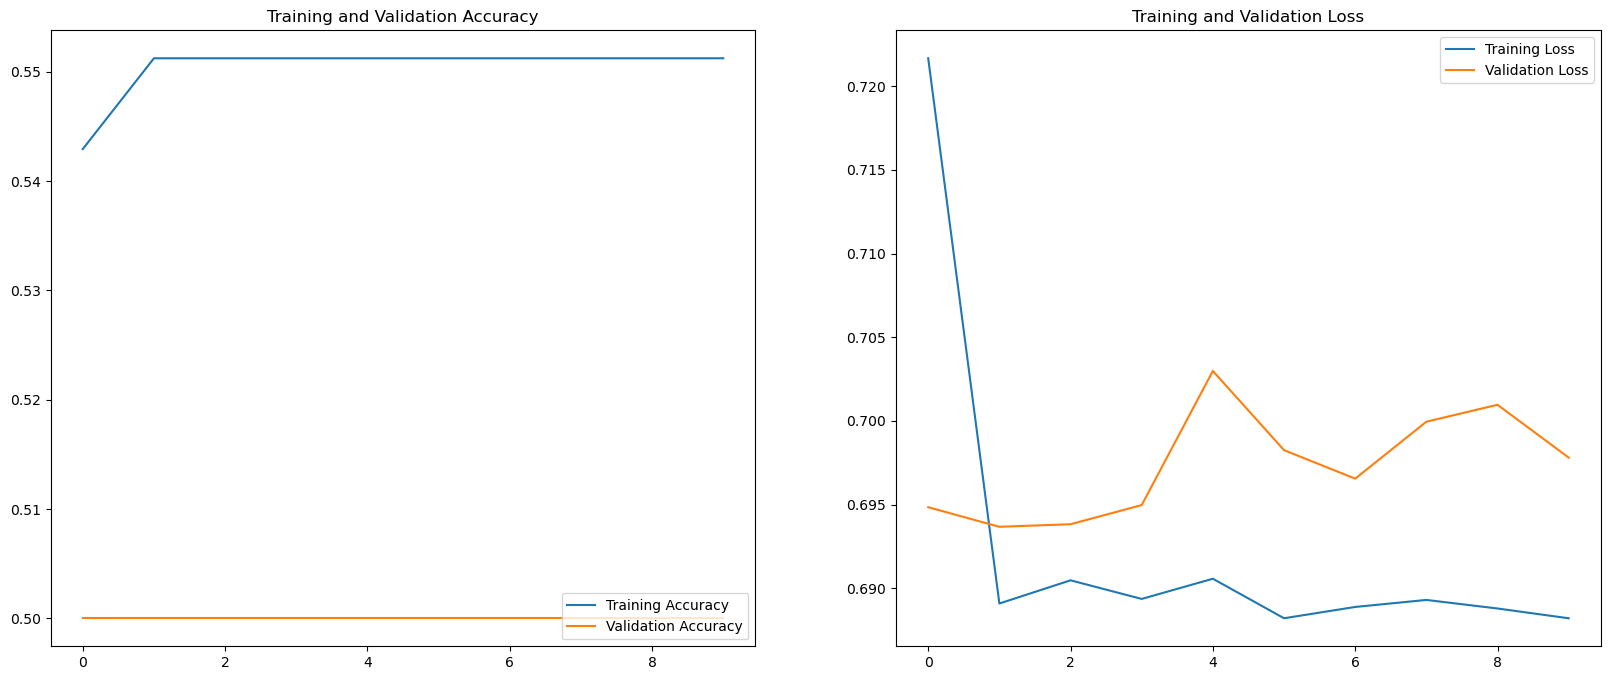

In [19]:
plt.figure(figsize=(20, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## melakukan memasukkan prediksi pada model yang telah di buat

In [24]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)
    predictions = model.predict(img_array)
    predicted_class = class_name[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 1)
    return predicted_class, confidence

# menvisualisasikan data yang telah di prediksi

1/1 [==============================] - 0s 250ms/step


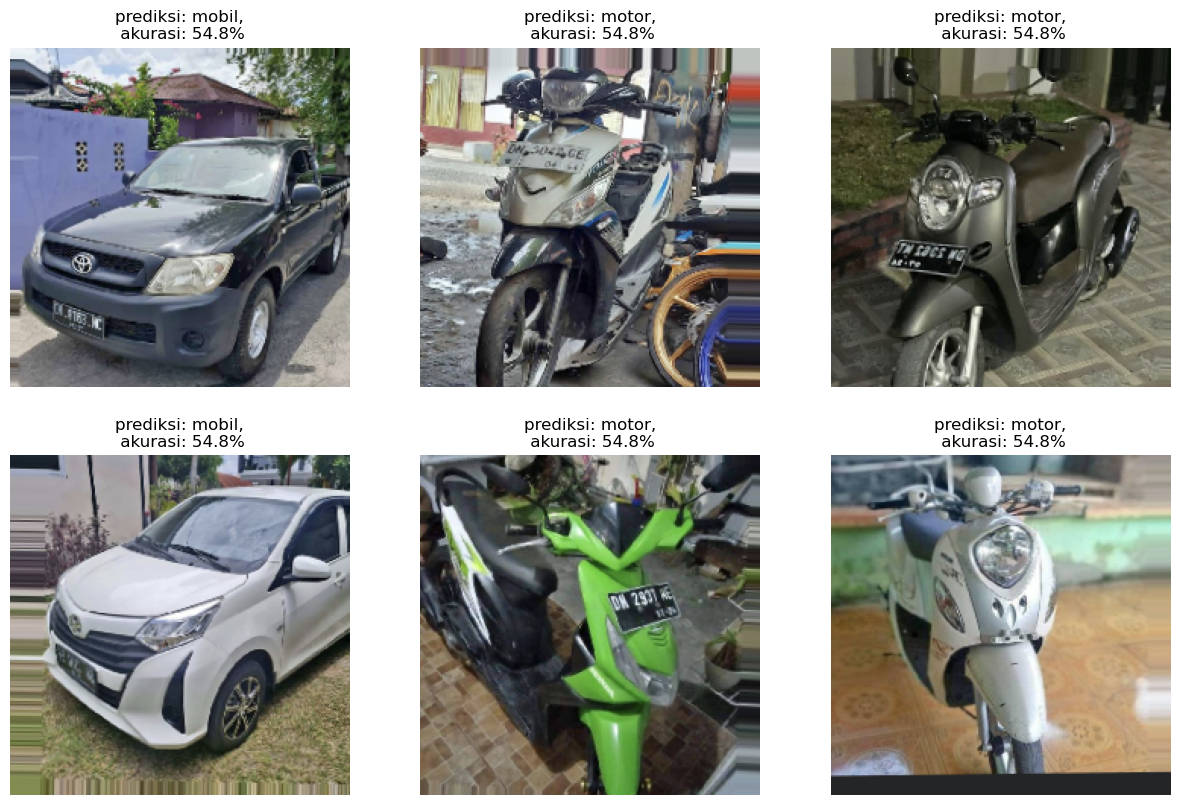

In [52]:
plt.figure(figsize=(15, 15))

for images, labels in test_generator:
    for i in range(6):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_name[int(labels[i])] 
        plt.title(f"prediksi: {actual_class},\n akurasi: {confidence}%")
        plt.axis("off")
    break

## Conclusion

Pada percobaan kali ini yang telah di lakukan proses pembuatan arsiktektur secara manual, dan di lakukan sebuah prediksi pada gambar mobil dan motor, dengan demikian dapat di simpulkan bahwa setelah di lakukan fit transform pada arsitektur yang di buat, di ketahui bahwa program yang telah di buat sudah bisa memprediksi mobil dan motor, ketika inputannya gambar mobil dia akan memprediksi gambar mobil, begitu juga dengan motor. dan hasil akurasi yang telah di training saya memperoleh nilai akurasi 54.8% itu bukanlah nilai yang buruk tetapi nilai yang normal untuk pemula